# **The Keras functional API**

In [ ]:
from tensorflow.keras.layers import Input, Dense, Flatten, Conv1D, AveragePooling1D
from tensorflow.keras.models import Model

inputs = Input(shape=(32, 1)) # this is time series data with 1 value at a time as an input out of 32 values or list
h = Conv1D(16, 5, activation = 'relu',)(inputs)
h = AveragePooling1D(3)(h)
h = Flatten()(h)
outputs = Dense(20, activation = 'sigmoid')(h)

model = Model(inputs = inputs, outputs = outputs)
model.summary()

In [ ]:
model.compile(loss = "binary_crossentropy", optimizer= 'rmsprop', metrics = ['accuracy'])
history = model.fit(X_train, y_train, validation_data=[X_val, y_data], epochs = 20)
test_loss, test_acc = model.evaluate(X_test, y_test)
preds = model.predict(X_sample) 

***
<a id="coding_tutorial_1"></a>
## Multiple inputs and Multiple outputs

**Attribute information:**

Inputs:
- Temperature of patient : 35C-42C
- Occurrence of nausea : yes/no
- Lumbar pain : yes/no
- Urine pushing (continuous need for urination) : yes/no
- Micturition pains : yes/no
- Burning of urethra, itch, swelling of urethra outlet : yes/no

Outputs:
- decision 1: Inflammation of urinary bladder : yes/no
- decision 2: Nephritis of renal pelvis origin : yes/no

In [ ]:
# Load the dataset

from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

pd_dat = pd.read_csv('/content/drive/My Drive/datasets/diagnosis.csv')
dataset = pd_dat.values

In [ ]:
# dataset

In [ ]:
# Building train and test data splits

X_train, X_test, y_train, y_test = train_test_split(dataset[:, :-2], dataset[:, 6:], test_size = 0.33)  # from 6th col labels col start
print(X_train.shape)   # (80, 6)  --> 6 features cols
print(y_train.shape)  # (80, 2)  --> 2 label cols

(80, 6)
(80, 2)


In [ ]:
# Assign training and testing inputs/outputs

temp_train, nocc_train, lumbp_train, up_train, mict_train, bis_train = np.transpose(X_train)
temp_test, nocc_test, lumbp_test, up_test, mict_test, bis_test = np.transpose(X_test)

# breaking 2 labels and storing them in seperate list
inflam_train, nephr_train = y_train[:, 0] , y_train[:, 1]
inflam_test, nephr_test = y_test[:, 0], y_test[:, 1]


**Build The Model**

In [ ]:
# Build the input layers

from tensorflow.keras import Input, layers
import tensorflow as tf

shape_inputs = (1,)
temperature = Input(shape= shape_inputs, name = "temp")
nausea_occurences = Input(shape= shape_inputs, name = "nocc")
lumbar_pain = Input(shape= shape_inputs, name = "lumbp")
urine_pushing = Input(shape= shape_inputs, name = "up")
micturation_pains = Input(shape= shape_inputs, name = "mict")
bis = Input(shape= shape_inputs, name = "bis")


In [ ]:
# Now we will define list containing all the inputs of the model

list_inputs = [temperature, nausea_occurences, lumbar_pain, urine_pushing, micturation_pains, bis]

In [ ]:
# Merge all the input features into a single large vectors. 
# merging the layers of input

x = layers.concatenate(list_inputs)


In [ ]:
# Use a logistic regression classifier for disease prediction
# Now we can define output layers and name them as well

inflamation_pred = layers.Dense(1, activation= 'sigmoid',  name = "inflam")(x)
nephritis_pred = layers.Dense(1, activation= 'sigmoid',  name = "nephr")(x)



In [ ]:
# Create a list of all the outputs

list_outputs = [inflamation_pred, nephritis_pred]


In [ ]:
# create the Model object
# finally we r initiaing end to end model predicitng the presence of 2 diseases by merely specifying the inputs and outputs
model = tf.keras.Model(inputs= list_inputs, outputs = list_outputs)


### **Plot the Model**

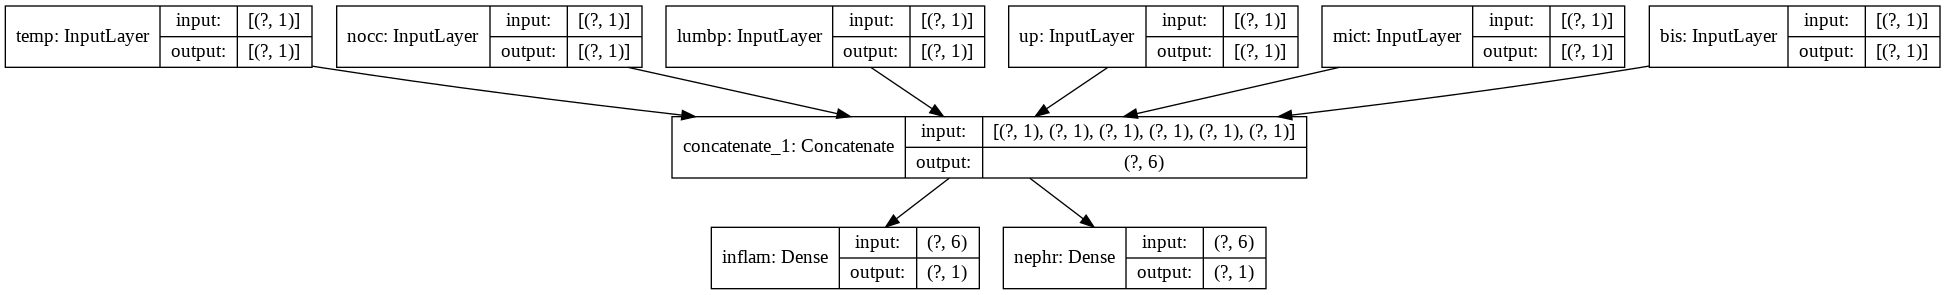

In [ ]:
# Disply multi input/output model

tf.keras.utils.plot_model(model, 'multi_input_output_model.png', show_shapes=True)


## **Compile model**

for specifying loss we will use the name of the final output layer. we will specify 2 different losses for 2 different output layers

We can also use **loss_weight** keyword to give weight to each output when computing the loss. 

In [ ]:
model.compile(optimizer=tf.keras.optimizers.RMSprop(1e-3),
              loss = {"inflam" : "binary_crossentropy",        #  for specifying loss we will use the name of the final output layer. we will specify 2 different losses for 2 different output layers
                      "nephr": "binary_crossentropy"}, 
              metrics = ["acc"], loss_weights = [1., 0.2] )
          

There is another way of defining the losses as well. You can use this one too

In [ ]:
model.compile(optimizer=tf.keras.optimizers.RMSprop(1e-3),
              loss = ["binary_crossentropy", "binary_crossentropy"],     #  order of defining losses for 2 different output layers matter here. 
              metrics = ["acc"], loss_weights = [1., 0.2]) 

# Here we'r using acc metrics for both outputs
# we can also define different metrics for each output layer.
# e.g is given below 

In [ ]:
model.compile(optimizer=tf.keras.optimizers.RMSprop(1e-3),
              loss = ["binray_crossentropy", "binary_crossentropy"],     #  order of defining losses for 2 different output layers matter here. 
              metrics = [["acc"], ["mse"]], loss_weights = [1., 0.2]) 
# here we r specifying metrics like calculate the accuracy score for the first output layer and calculate mean square error for the 
# second output layer. We did this by simply puting them in a list. 
# We can also do the same work with the help of dictionary based defination as we did for loss function. 
# For e.g.

model.compile(optimizer=tf.keras.optimizers.RMSprop(1e-3),
              loss = ["binary_crossentropy", "binary_crossentropy"],      
              metrics = {"inflam": ["acc"], 
                          "nephr": ["acc"] }, loss_weights = [1., 0.2]) 


In [ ]:
# Define Training inputs and outputs
# we can define inputs and outputs of the data in the form of dict or in the form of list, it's upto u..
# Dict based:
inputs_train = {'temp': temp_train, 'nocc': nocc_train, 'lumbp': lumbp_train,
                'up': up_train, 'mict': mict_train, 'bis': bis_train}

outputs_train = {'inflam': inflam_train, 'nephr': nephr_train}

In [52]:
# list/vector based:
inputs_train = [temp_train, nocc_train, lumbp_train, up_train, mict_train, bis_train]

outputs_train = [inflam_train, nephr_train]

In [53]:
# We r passing training and testing data in the form of list
history = model.fit(inputs_train, outputs_train, 
                    epochs = 500, 
                    batch_size= 128,
                    verbose = True)

Epoch 1/500
1/1 [==============================] - 0s 2ms/step - loss: 0.3063 - inflam_loss: 0.2509 - nephr_loss: 0.2768 - inflam_acc: 0.9250 - nephr_acc: 0.9375
Epoch 2/500
1/1 [==============================] - 0s 1ms/step - loss: 0.3061 - inflam_loss: 0.2508 - nephr_loss: 0.2766 - inflam_acc: 0.9000 - nephr_acc: 0.9375
Epoch 3/500
1/1 [==============================] - 0s 3ms/step - loss: 0.3059 - inflam_loss: 0.2506 - nephr_loss: 0.2765 - inflam_acc: 0.9250 - nephr_acc: 0.9375
Epoch 4/500
1/1 [==============================] - 0s 2ms/step - loss: 0.3057 - inflam_loss: 0.2505 - nephr_loss: 0.2763 - inflam_acc: 0.9000 - nephr_acc: 0.9375
Epoch 5/500
1/1 [==============================] - 0s 2ms/step - loss: 0.3055 - inflam_loss: 0.2503 - nephr_loss: 0.2762 - inflam_acc: 0.9250 - nephr_acc: 0.9375
Epoch 6/500
1/1 [==============================] - 0s 1ms/step - loss: 0.3053 - inflam_loss: 0.2501 - nephr_loss: 0.2761 - inflam_acc: 0.9000 - nephr_acc: 0.9375
Epoch 7/500
1/1 [===========

## **Plot the learning Curve**

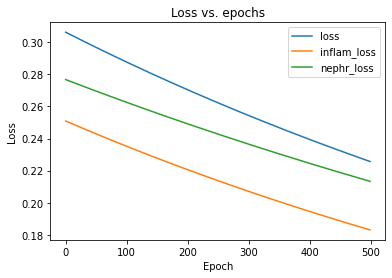

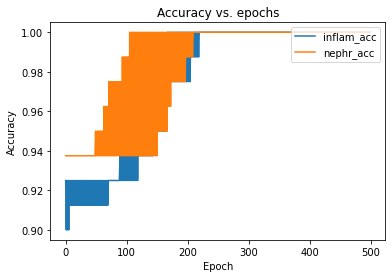

In [56]:
# PLot the acc and loss for 2 outputs
import matplotlib.pyplot as plt
%matplotlib inline

acc_keys = [k for k in history.history.keys() if k in ('inflam_acc', 'nephr_acc')]
loss_keys = [k for k in history.history.keys() if not k in acc_keys]

for k, v in history.history.items():
  if k in acc_keys:
    plt.figure(1)
    plt.plot(v)
  else:
    plt.figure(2)
    plt.plot(v)

plt.figure(1)
plt.title('Accuracy vs. epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(acc_keys, loc='upper right')

plt.figure(2)
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loss_keys, loc='upper right')

plt.show()




In [57]:
# Evaluate the model

model.evaluate([temp_test, nocc_test, lumbp_test, up_test, mict_test, bis_test], [inflam_test, nephr_test], verbose=2)
# we will provide list of test inputs and outputs

2/2 - 0s - loss: 0.2724 - inflam_loss: 0.2285 - nephr_loss: 0.2196 - inflam_acc: 1.0000 - nephr_acc: 1.0000


[0.27239495515823364, 0.22847071290016174, 0.21962113678455353, 1.0, 1.0]